In [5]:
import sys
import os
module_path = os.path.abspath(os.path.join('../../../../src'))
if module_path not in sys.path:
    sys.path.append(module_path)

%config InlineBackend.figure_format = 'retina'

In [6]:
from computations.insights.opinions import varying_parameters
from plotting.basic import *
from plotting.summaries import *
from matplotlib import pyplot as plt
from computations.probabilistic.vectorised import *
from society.structure.network import ArtificialNetwork
from society.beliefs import Distribution, BeliefDistribution
from computations.insights.opinions import mse_tolerances_uncertainty

In [7]:
linespace = Distribution(type="linespace", range=(-1,1))
unique = Distribution(type="unique", value=0.2)
belief_distribution = BeliefDistribution(unique, unique, linespace)
network = ArtificialNetwork(1000, "random_graph", p=0.1)
agent_network = AgentNetwork(belief_distribution, network, agent_type=AnalyticalAgent)

In [8]:
update_rule = UpdateRule(evaluation_bias=0.3, assimilation_bias=0.1, rewire_probability=0, tolerance=1)
interactions = Interactions(update_rule, interaction_rate=0.5, interacting_agents=True)
insights = Insights(["polarisation"])
simulation = Simulation(1000, insights)

In [9]:
initial_uncertainties = [0.1, 0.15, 0.2, 0.25, 0.3, 0.35]
interactions.update_rule.evaluation_bias = 0.3
interactions.update_rule.assimilation_bias = 0
polarisation_results = []
for initial_uncertainty in initial_uncertainties:
    unique = Distribution(type="unique", value=initial_uncertainty)
    agent_network.set_uncertainties(unique)
    simulation.run(interactions, agent_network)
    polarisation_results.append(simulation.insights.polarisation_evolution)

Progress: 100%|██████████| 1000/1000 [00:07<00:00, 133.11it/s]


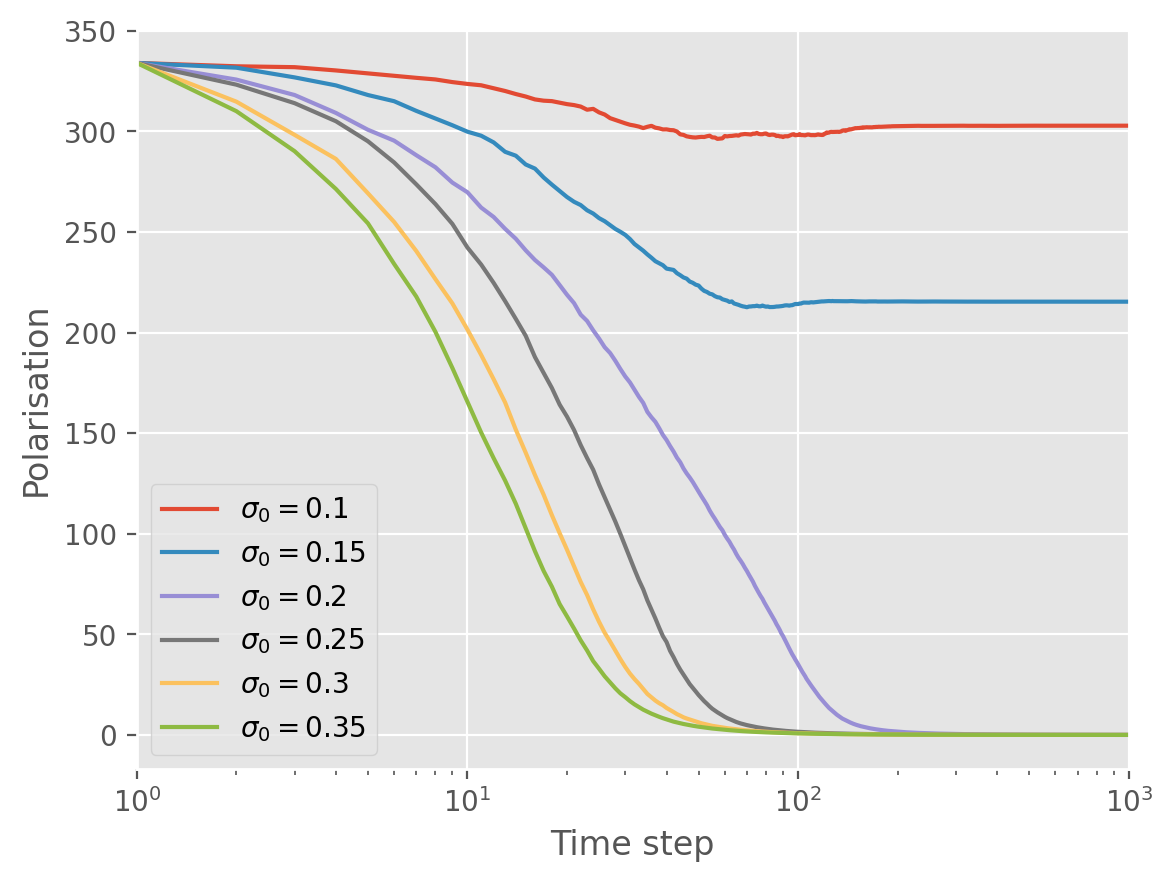

In [14]:
plt.xscale('log')
for i in range(len(polarisation_results)):
    plt.plot(polarisation_results[i], label=r'$\sigma_0 = {}$'.format(initial_uncertainties[i]))
plt.ylabel("Polarisation")
plt.xlabel("Time step")
plt.xlim(1, 1000)
plt.legend()